In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
url = "https://github.com/YBI-Foundation/Dataset/raw/main/NSE%20Gold%20CPI%20.xlsx"
data = pd.read_excel(url, engine='openpyxl')

# Установим стиль для графиков
sns.set(style="whitegrid")

# Преобразуем столбец с датой в формат datetime
data['Date'] = pd.to_datetime(data['Date'])

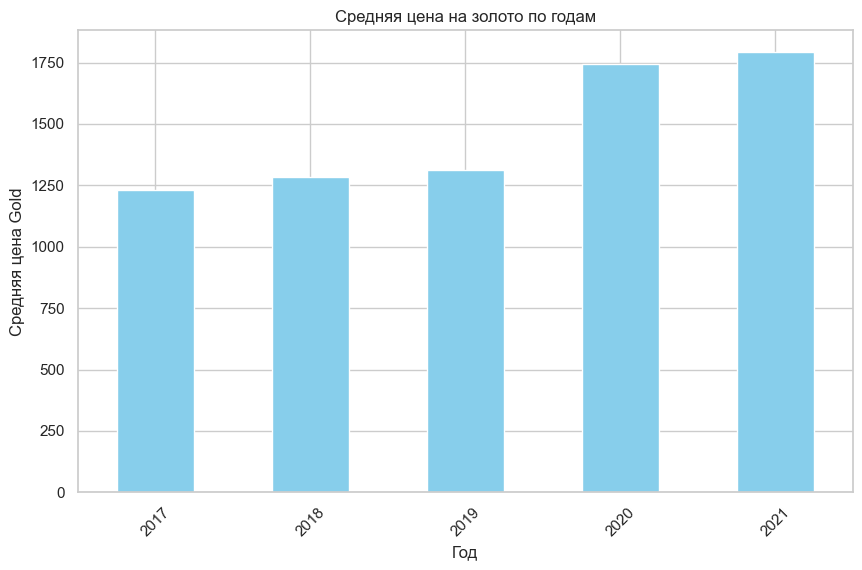

In [14]:
# 1. Столбчатая диаграмма для среднего значения Gold по годам
yearly_gold = data.groupby(data['Date'].dt.year)['Gold'].mean()
plt.figure(figsize=(10, 6))
yearly_gold.plot(kind='bar', color='skyblue')
plt.title('Средняя цена на золото по годам')
plt.xlabel('Год')
plt.ylabel('Средняя цена Gold')
plt.xticks(rotation=45)
plt.show()

Cтолбчатая диаграмма (средняя цена золота по годам): В теории полезно для выявления общих трендов в динамике цен на золото. Если цены растут, это может сигнализировать о повышенном спросе или инфляции, что актуально для долгосрочных инвесторов.

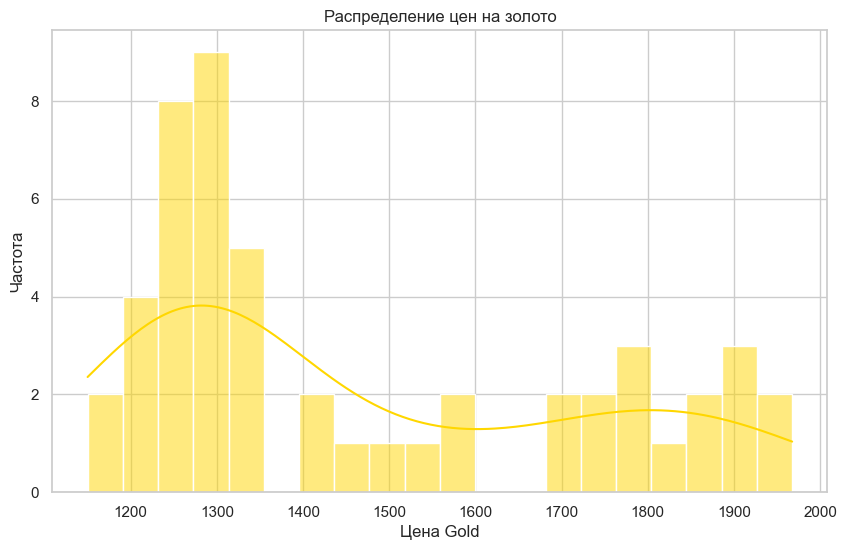

In [15]:
# 2. Гистограмма для распределения цены золота
plt.figure(figsize=(10, 6))
sns.histplot(data['Gold'], bins=20, kde=True, color='gold')
plt.title('Распределение цен на золото')
plt.xlabel('Цена Gold')
plt.ylabel('Частота')
plt.show()

Гистограмма (распределение цен на золото): Показывает, какие цены на золото встречаются чаще. Это позволяет оценить волатильность. Если распределение шире, значит, золото подвержено большим колебаниям цен.

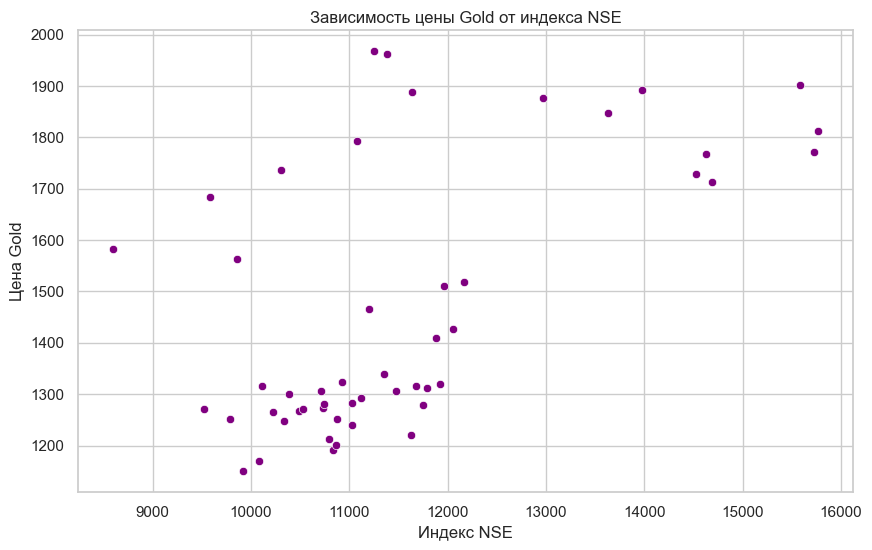

In [16]:
# 3. Точечная диаграмма для переменных Gold и NSE
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['NSE'], y=data['Gold'], color='purple')
plt.title('Зависимость цены Gold от индекса NSE')
plt.xlabel('Индекс NSE')
plt.ylabel('Цена Gold')
plt.show()

Точечная диаграмма (Gold vs. NSE): Помогает определить связь между ценой золота и индексом NSE. Если наблюдается тренд, это может указывать на корреляцию между фондовым рынком и золотом, может быть важно для портфельных инвесторов.

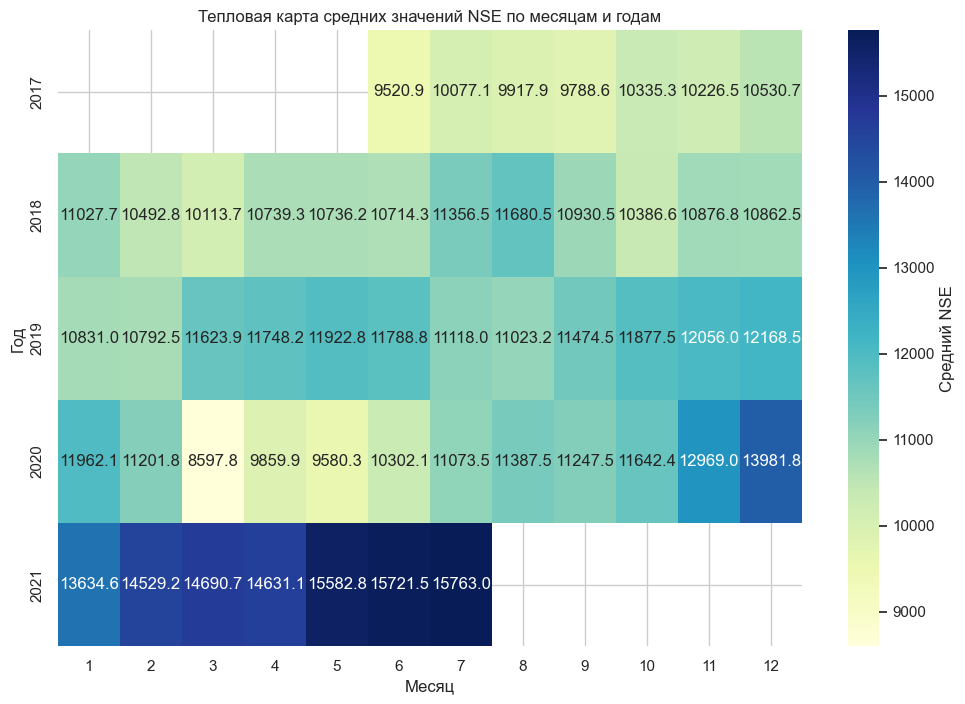

In [17]:
# 4. Тепловая карта для средних значений NSE по месяцам и годам
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
monthly_nse = data.pivot_table(values='NSE', index='Year', columns='Month', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_nse, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Средний NSE'})
plt.title('Тепловая карта средних значений NSE по месяцам и годам')
plt.xlabel('Месяц')
plt.ylabel('Год')
plt.show()

Тепловая карта (NSE по месяцам и годам): Удобна для отслеживания сезонных изменений индекса NSE, выявления трендов и аномалий.